In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("BIKE DETAILS.csv")   # update path if needed
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
df.shape

(1061, 7)

In [11]:
df.sample(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
98,Hero Splendor Plus,30000,2015,Individual,1st owner,30000,NaN
795,Hero Honda Splendor,10000,2006,Individual,1st owner,75000,NaN
231,TVS Apache RTR 200 4V,95000,2018,Individual,1st owner,9600,NaN
632,Bajaj Pulsar 150,35000,2011,Individual,1st owner,50000,NaN
709,Bajaj V15,40000,2016,Individual,1st owner,34000,67187.0


In [12]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [13]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [15]:
df.dropna(axis = 0, inplace = True)

In [16]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [17]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [18]:
df['name']

,name
2,Royal Enfield Classic Gunmetal Grey
3,Yamaha Fazer FI V 2.0 [2016-2018]
5,Honda CB Twister
6,Honda CB Hornet 160R
9,Bajaj Discover 125
...,...
1056,Activa 3g
1057,Honda CB twister
1058,Bajaj Discover 125
1059,Honda CB Shine


In [19]:
# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns


In [20]:
numeric_features

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

In [21]:
categorical_features

Index(['name', 'seller_type', 'owner'], dtype='object')

In [22]:
print("Numeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))

Numeric Features: ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
Categorical Features: ['name', 'seller_type', 'owner']


In [23]:
# Quick summary
df.describe(include='all')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
count,626,626.000000,626.000000,626,626,626.000000,6.260000e+02
unique,183,NaN,NaN,2,4,NaN,NaN
top,Honda Activa [2000-2015],NaN,NaN,Individual,1st owner,NaN,NaN
freq,23,NaN,NaN,623,556,NaN,NaN
mean,NaN,59445.164537,2014.800319,NaN,NaN,32671.576677,8.795871e+04
std,NaN,59904.350888,3.018885,NaN,NaN,45479.661039,7.749659e+04
min,NaN,6000.000000,2001.000000,NaN,NaN,380.000000,3.049000e+04
25%,NaN,30000.000000,2013.000000,NaN,NaN,13031.250000,5.485200e+04
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000,7.275250e+04
75%,NaN,65000.000000,2017.000000,NaN,NaN,40000.000000,8.703150e+04


In [25]:
df['name'].dtypes

dtype('O')

In [26]:
df['name'].nunique()

183

In [28]:
# Most common bike models
df['name'].value_counts().head(10)

,count
name,
Honda Activa [2000-2015],23
Honda CB Hornet 160R,22
Bajaj Pulsar 180,20
Bajaj Discover 125,16
Yamaha FZ S V 2.0,16
Honda Activa 3G,15
Honda CB Unicorn 150,14
Bajaj Pulsar 135 LS,13
Honda Activa 5G,12


In [29]:

# Sample bike names
df['name'].unique()[:10]

array(['Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Honda CB Twister',
       'Honda CB Hornet 160R', 'Bajaj Discover 125', 'Yamaha FZ16',
       'Honda Navi', 'Bajaj Avenger Street 220', 'Yamaha YZF R3',
       'Suzuki Access 125 [2007-2016]'], dtype=object)

In [30]:
df['selling_price']

,selling_price
2,150000
3,65000
5,18000
6,78500
9,50000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [31]:
df['selling_price'].dtype

dtype('int64')

In [33]:
df['selling_price'].describe()

,selling_price
count,626.000000
mean,59445.164537
std,59904.350888
min,6000.000000
25%,30000.000000
50%,45000.000000
75%,65000.000000
max,760000.000000


In [34]:
df['selling_price'].min()

6000

In [35]:
df['selling_price'].max()

760000

In [36]:
df['selling_price'].median()

45000.0

In [37]:
df['selling_price'].isnull().sum()

np.int64(0)

# Distribution of sellling price

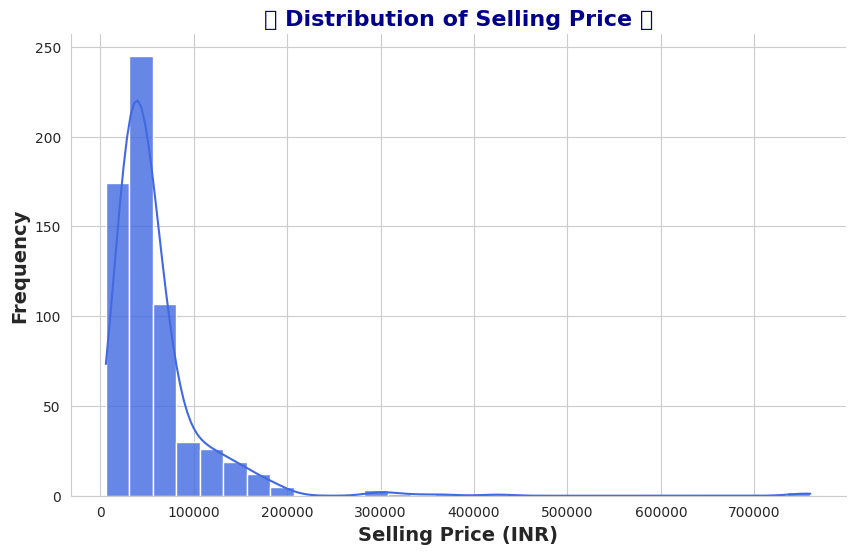

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set_style("whitegrid")
sns.set_palette("crest")  # soft gradient palette

# Bigger figure for clarity
plt.figure(figsize=(10,6))

# Histogram with KDE, custom bins, and transparency
sns.histplot(df['selling_price'],
             kde=True,
             bins=30,          # more bins for detail
             color="royalblue",# elegant color
             edgecolor="white",
             alpha=0.8)

# Labels and title with styling
plt.xlabel('Selling Price (INR)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title("✨ Distribution of Selling Price ✨", fontsize=16, fontweight='bold', color="darkblue")

# Remove top/right spines for a clean look
sns.despine()

# Show plot
plt.show()


In [42]:
# Convert to numeric if required
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


In [43]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [44]:

# Verify conversion
df[['selling_price']].head()

,selling_price
2,150000
3,65000
5,18000
6,78500
9,50000


from matplotlib import pyplot as plt
_df_0['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['selling_price'].plot(kind='line', figsize=(8, 4), title='selling_price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:
df['year']

,year
2,2018
3,2015
5,2010
6,2018
9,2016
...,...
1056,2010
1057,2012
1058,2013
1059,2009


In [48]:
df['year'].dtype

dtype('int64')

In [49]:
df['year'].describe()

,year
count,626.000000
mean,2014.800319
std,3.018885
min,2001.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2020.000000


In [51]:
df['year'].unique()

array([2018, 2015, 2010, 2016, 2019, 2012, 2013, 2017, 2011, 2009, 2014,
       2008, 2020, 2007, 2001, 2006, 2004, 2005])

In [52]:
#count of bikes per manufacturing year
df['year'].value_counts().sort_index()

,count
year,
2001,1
2004,1
2005,1
2006,4
2007,6
2008,7
2009,14
2010,28
2011,33


In [53]:
#visualization : number of bikes by  year

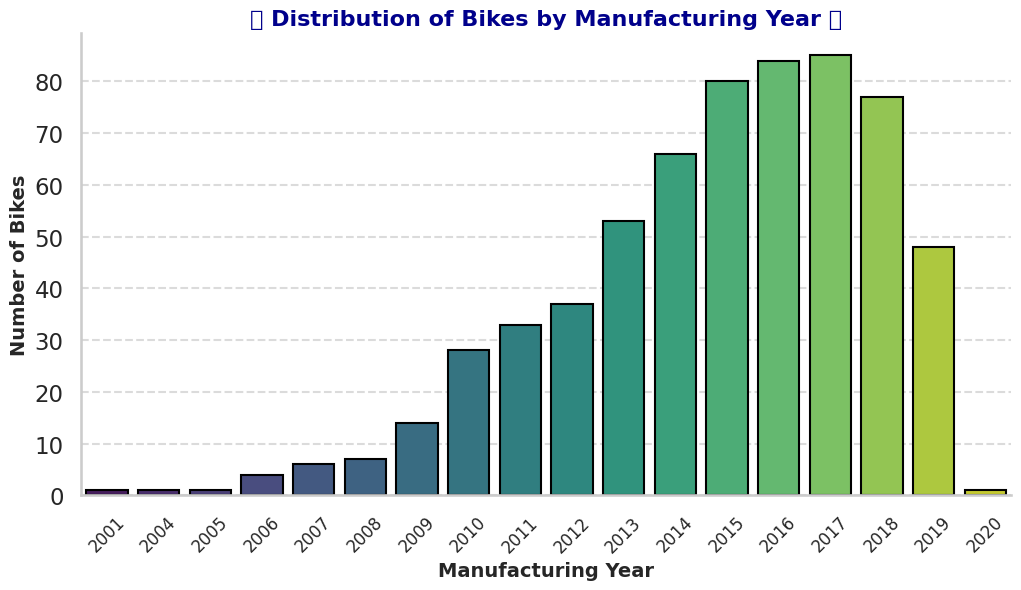

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")   # larger fonts for presentations

plt.figure(figsize=(12,6))  # bigger canvas

# Countplot with custom colors
sns.countplot(x='year', data=df,
              palette="viridis",   # gradient color palette
              edgecolor="black")

# Rotate ticks and format labels
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Manufacturing Year", fontsize=14, fontweight='bold')
plt.ylabel("Number of Bikes", fontsize=14, fontweight='bold')
plt.title("🚲 Distribution of Bikes by Manufacturing Year 🚲",
          fontsize=16, fontweight='bold', color="darkblue")

# Remove unnecessary spines
sns.despine()

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [57]:
df['seller_type'].dtype

dtype('O')

In [58]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [59]:
#count for missing values


In [60]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,623
Dealer,3


In [61]:
# Check for missing values
df['seller_type'].isnull().sum()

np.int64(0)

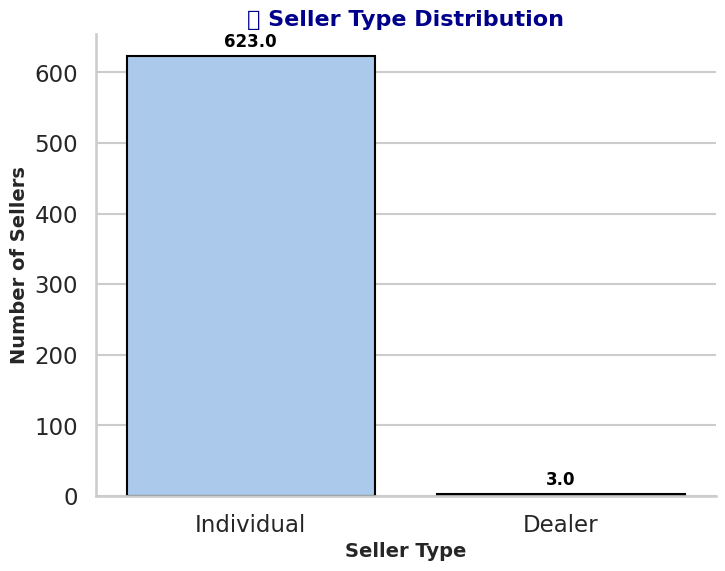

In [64]:
# Visualization: Seller type distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(8,6))

# Countplot with colors and outlines
ax = sns.countplot(x='seller_type', data=df,
                   palette="pastel", edgecolor="black")

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, fontweight='bold',
                color='black', xytext=(0, 10),
                textcoords='offset points')

# Labels and title
plt.xlabel("Seller Type", fontsize=14, fontweight='bold')
plt.ylabel("Number of Sellers", fontsize=14, fontweight='bold')
plt.title("📊 Seller Type Distribution", fontsize=16, fontweight='bold', color="darkblue")

sns.despine()
plt.show()



In [ ]:
#explore the owner columns (Ownership Hisory )

In [66]:
df['owner'].dtype

dtype('O')

In [67]:
df['owner'].unique()  #unique Ownership categorical

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [68]:
df['owner'].value_counts()

,count
owner,
1st owner,556
2nd owner,66
3rd owner,3
4th owner,1


In [69]:
# Check for missing values
df['owner'].isnull().sum()

np.int64(0)

In [71]:
#average selling price by owner type
df.groupby('owner')['selling_price'].mean()

,selling_price
owner,
1st owner,58431.967626
2nd owner,64795.439394
3rd owner,39333.333333
4th owner,330000.000000


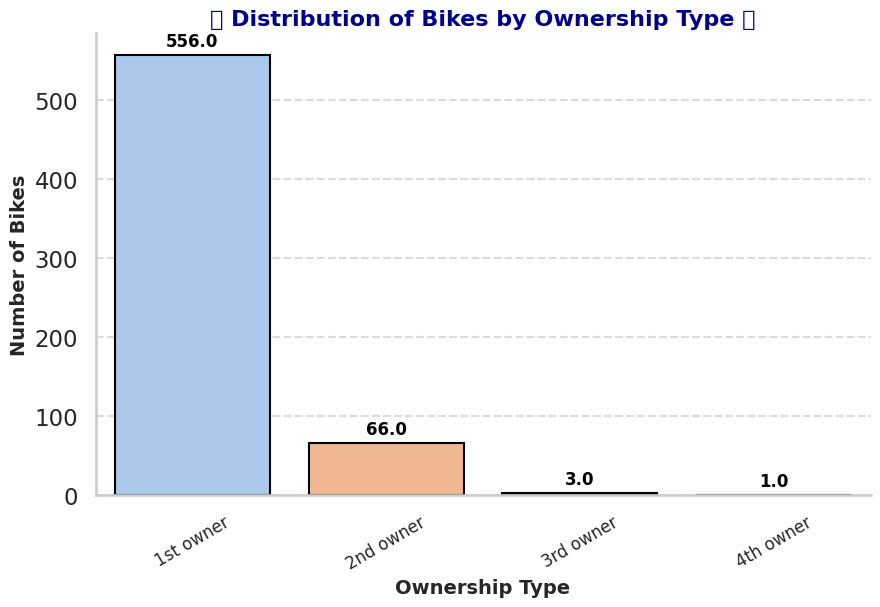

In [74]:
#visualization : Ownership distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10,6))

# Countplot with pastel colors and outlines
ax = sns.countplot(x='owner', data=df,
                   palette="pastel", edgecolor="black")

# Rotate ticks and format labels
plt.xticks(rotation=30, fontsize=12)
plt.xlabel("Ownership Type", fontsize=14, fontweight='bold')
plt.ylabel("Number of Bikes", fontsize=14, fontweight='bold')
plt.title("🚲 Distribution of Bikes by Ownership Type 🚲",
          fontsize=16, fontweight='bold', color="darkblue")

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, fontweight='bold',
                color='black', xytext=(0, 10),
                textcoords='offset points')

# Clean up chart
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Exploring the 'km_driven' column (Total Kilometers Driven)


In [76]:
df['km_driven'].dtype

dtype('int64')

In [78]:
#STATICAL METHOD
df['km_driven'].describe()

,km_driven
count,626.000000
mean,32671.576677
std,45479.661039
min,380.000000
25%,13031.250000
50%,25000.000000
75%,40000.000000
max,585659.000000


In [80]:
# Minimum, maximum, and median kilometers driven
df['km_driven'].min()



380

In [81]:
df['km_driven'].median()

25000.0

In [82]:
df['km_driven'].max()

585659

In [84]:
#check for missing value
df['km_driven'].isnull().sum()

np.int64(0)

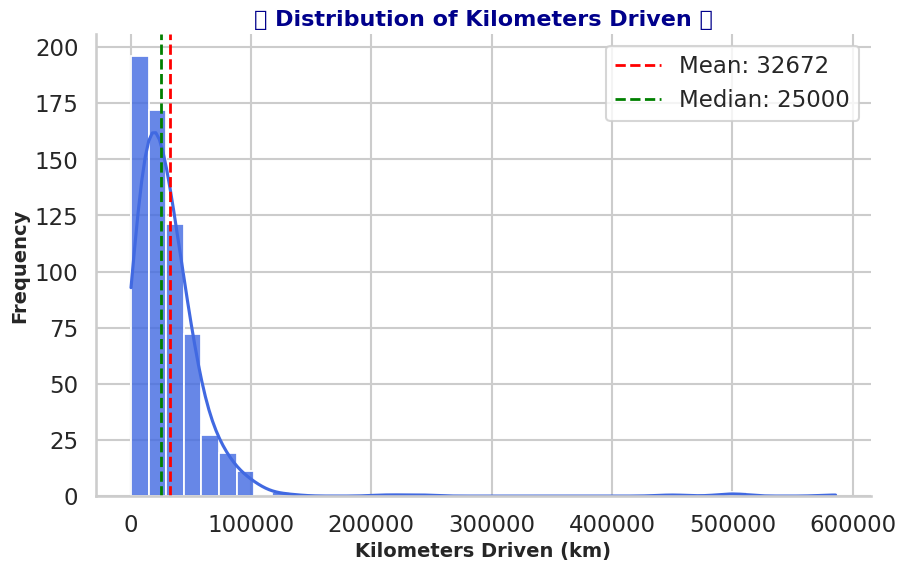

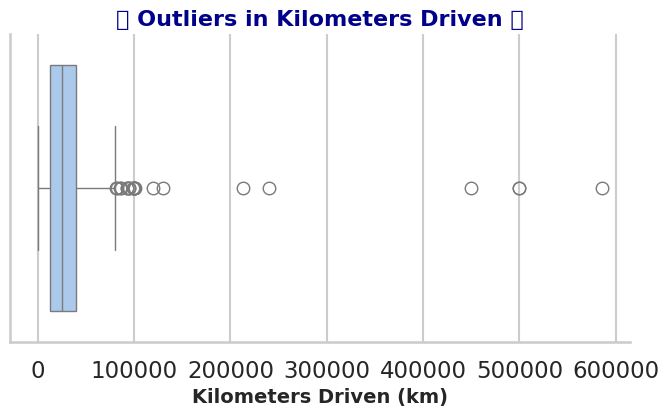

In [87]:
#Distribution of km_drives
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# --- Histogram with KDE ---
plt.figure(figsize=(10,6))
sns.histplot(df['km_driven'], kde=True, bins=40,
             color="royalblue", edgecolor="white", alpha=0.8)

plt.xlabel("Kilometers Driven (km)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.title("🚗 Distribution of Kilometers Driven 🚗", fontsize=16, fontweight='bold', color="darkblue")

# Add vertical lines for mean & median
plt.axvline(df['km_driven'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['km_driven'].mean():.0f}")
plt.axvline(df['km_driven'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['km_driven'].median():.0f}")
plt.legend()

sns.despine()
plt.show()

# --- Boxplot for Outliers ---
plt.figure(figsize=(8,4))
sns.boxplot(x=df['km_driven'], palette="pastel")

plt.title("📊 Outliers in Kilometers Driven 📊", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Kilometers Driven (km)", fontsize=14, fontweight='bold')

sns.despine()
plt.show()


In [88]:
#Exploring the ex_showroom_price (orignal_showroom price)
df['ex_showroom_price']

,ex_showroom_price
2,148114.0
3,89643.0
5,53857.0
6,87719.0
9,60122.0
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


In [89]:
df['ex_showroom_price'].dtype

dtype('float64')

In [90]:
df['ex_showroom_price'].min()

30490.0

In [92]:
df['ex_showroom_price'].max()

1278000.0

In [145]:
df['ex_showroom_price'].median()

72752.5

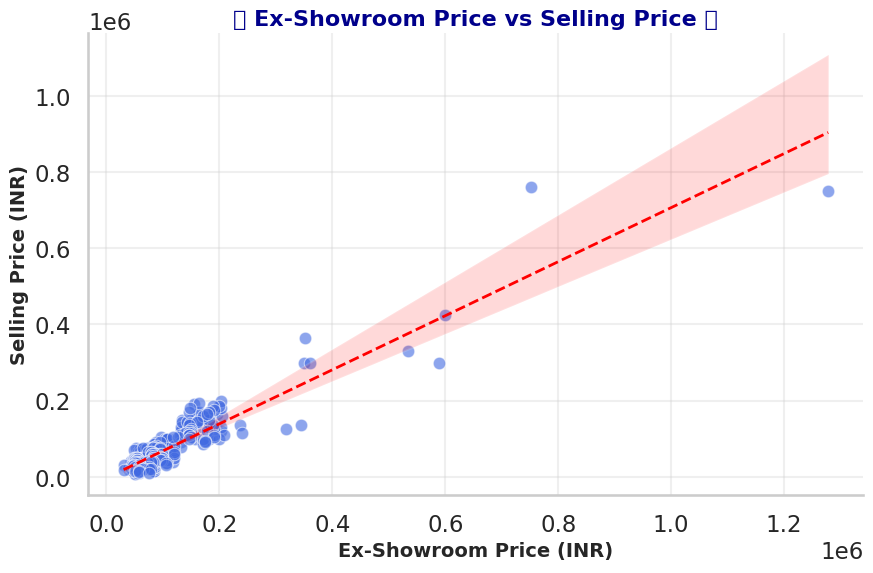

In [97]:
# Relationship between ex_showroom_price and selling_price
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10,6))

# Scatter plot with color and transparency
sns.scatterplot(x='ex_showroom_price', y='selling_price', data=df,
                color="royalblue", alpha=0.6, edgecolor="white")

# Add regression line for trend
sns.regplot(x='ex_showroom_price', y='selling_price', data=df,
            scatter=False, color="red", line_kws={"linewidth":2, "linestyle":"--"})

# Labels and title
plt.xlabel("Ex-Showroom Price (INR)", fontsize=14, fontweight='bold')
plt.ylabel("Selling Price (INR)", fontsize=14, fontweight='bold')
plt.title("💰 Ex-Showroom Price vs Selling Price 💰", fontsize=16, fontweight='bold', color="darkblue")

# Clean up chart
sns.despine()
plt.grid(alpha=0.3)

plt.show()


**Questions**

1.What is the range of selling prices in the dataset?


In [98]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

min_price, max_price, price_range


(6000, 760000, 754000)

2. What is the median selling price for bikes in the dataset?


In [99]:
df['selling_price'].median()


45000.0

3. What is the most common seller type?


In [100]:
df['seller_type'].value_counts().idxmax()


'Individual'

4. How many bikes have driven more than 50,000 kilometers?



In [103]:
df[df['km_driven'] > 50000].shape[0]


88

5. What is the average km_driven value for each ownership type?


In [107]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,33067.926259
2nd owner,29809.484848
3rd owner,30904.666667
4th owner,6500.000000


6. What proportion of bikes are from the year 2015 or older?

In [109]:
(df[df['year'] <= 2015].shape[0] / df.shape[0]) * 100


52.87539936102237

7. What is the trend of missing values across the dataset?


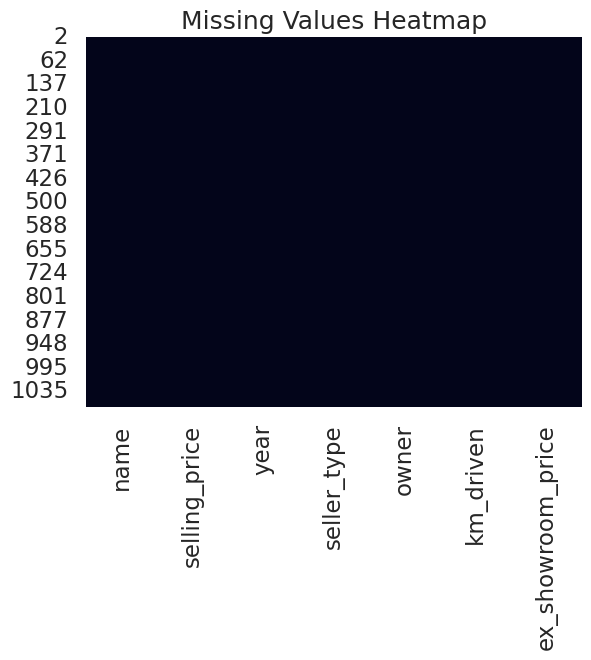

In [111]:
df.isnull().sum()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


8. What is the highest ex_showroom_price recorded, and for which bike?

In [113]:
df.loc[df['ex_showroom_price'].idxmax()][['name', 'ex_showroom_price']]


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


9.What is the total number of bikes listed by each seller type?


In [114]:
df['seller_type'].value_counts()


,count
seller_type,
Individual,623
Dealer,3


10. What is the relationship between selling_price and km_driven for first-owner bikes?



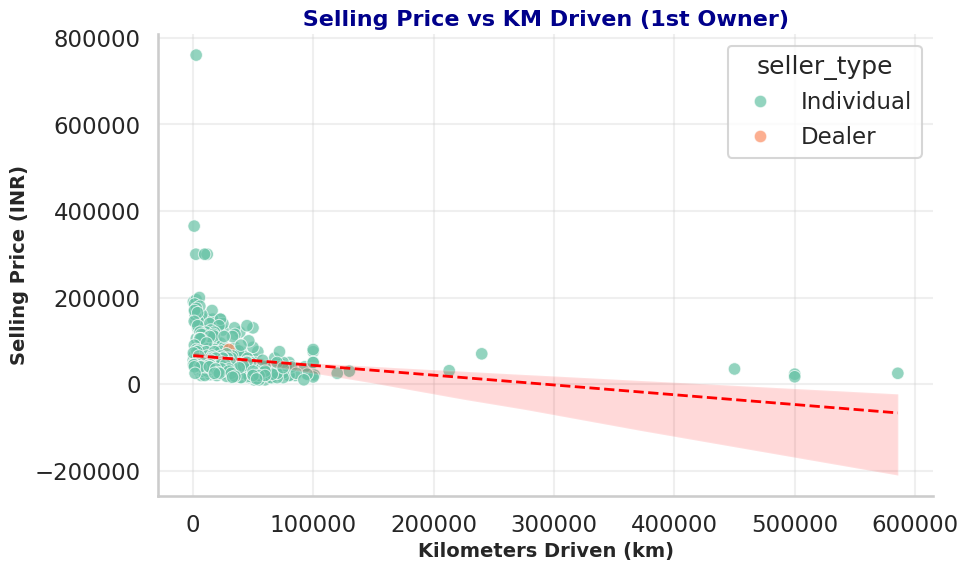

In [119]:
first_owner = df[df['owner'] == '1st owner']

plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner,
                hue='seller_type', palette="Set2", alpha=0.7, edgecolor="white")

# Add regression line to show trend
sns.regplot(x='km_driven', y='selling_price', data=first_owner,
            scatter=False, color="red", line_kws={"linewidth":2, "linestyle":"--"})

plt.xlabel("Kilometers Driven (km)", fontsize=14, fontweight='bold')
plt.ylabel("Selling Price (INR)", fontsize=14, fontweight='bold')
plt.title(" Selling Price vs KM Driven (1st Owner) ", fontsize=16, fontweight='bold', color="darkblue")

sns.despine()
plt.grid(alpha=0.3)
plt.show()



11. Identify and remove outliers in the km_driven column using the IQR method.

In [126]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['km_driven'] >= Q1 - 1.5*IQR) &
               (df['km_driven'] <= Q3 + 1.5*IQR)]


In [127]:
df_clean

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.


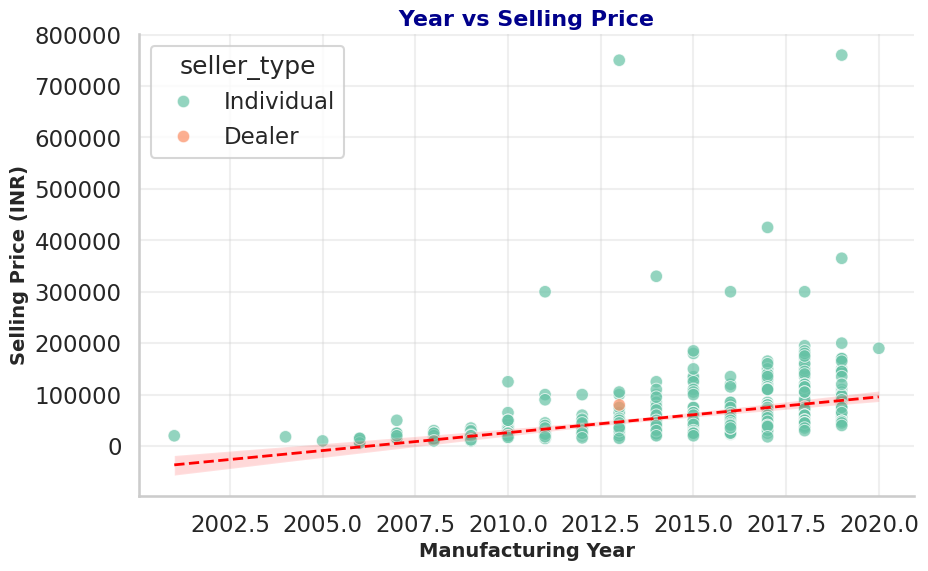

In [128]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df,
                hue='seller_type', palette="Set2", alpha=0.7, edgecolor="white")

# Add regression/trend line
sns.regplot(x='year', y='selling_price', data=df,
            scatter=False, color="red", line_kws={"linewidth":2, "linestyle":"--"})

plt.xlabel("Manufacturing Year", fontsize=14, fontweight='bold')
plt.ylabel("Selling Price (INR)", fontsize=14, fontweight='bold')
plt.title(" Year vs Selling Price ", fontsize=16, fontweight='bold', color="darkblue")

sns.despine()
plt.grid(alpha=0.3)
plt.show()


13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [134]:
# Calculate bike age using the current year
current_year = 2025
df['age'] = current_year - df['year']

# Average selling price based on bike age
avg_depreciation = df.groupby('age')['selling_price'].mean()

avg_depreciation


,selling_price
age,
5,190000.000000
6,111125.000000
7,87837.662338
8,70529.411765
9,53597.440476
10,54550.000000
11,49453.030303
12,52349.056604
13,32810.486486


14.Which bike names are priced significantly above the average price for their manufacturing year?


In [136]:
# Step 1: Calculate average selling price for each manufacturing year
avg_price_per_year = df.groupby('year')['selling_price'].mean()

In [137]:
# Step 2: Map the yearly average price back to the dataframe
df['avg_year_price'] = df['year'].map(avg_price_per_year)

In [138]:
# Step 3: Identify bikes priced significantly above the yearly average
# (here: selling price > average price of that year)
above_avg_bikes = df[df['selling_price'] >  df ['avg_year_price']]

In [139]:
# Display relevant details
above_avg_bikes[['name', 'year', 'selling_price', 'avg_year_price']].sort_values(
    by='selling_price', ascending=False
)

,name,year,selling_price,avg_year_price
295,Suzuki GSX S750,2019,760000,111125.000000
134,Harley-Davidson Street Bob,2013,750000,52349.056604
289,Kawasaki Ninja 650 [2018-2019],2017,425000,70529.411765
13,Yamaha YZF R3,2019,365000,111125.000000
311,Harley-Davidson Street 750,2014,330000,49453.030303
...,...,...,...,...
470,Honda Activa [2000-2015],2009,23000,22642.857143
773,Honda Activa [2000-2015],2009,23000,22642.857143
589,Bajaj Pulsar 180,2008,20100,19871.428571
619,Honda Activa [2000-2015],2006,15000,11500.000000


from matplotlib import pyplot as plt
_df_2['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['avg_year_price'].plot(kind='hist', bins=20, title='avg_year_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='year', y='selling_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='selling_price', y='avg_year_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['avg_year_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('avg_year_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['selling_price'].plot(kind='line', figsize=(8, 4), title='selling_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['avg_year_price'].plot(kind='line', figsize=(8, 4), title='avg_year_price')
plt.gca().spines[['top', 'right']].set_visible(False)

15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.


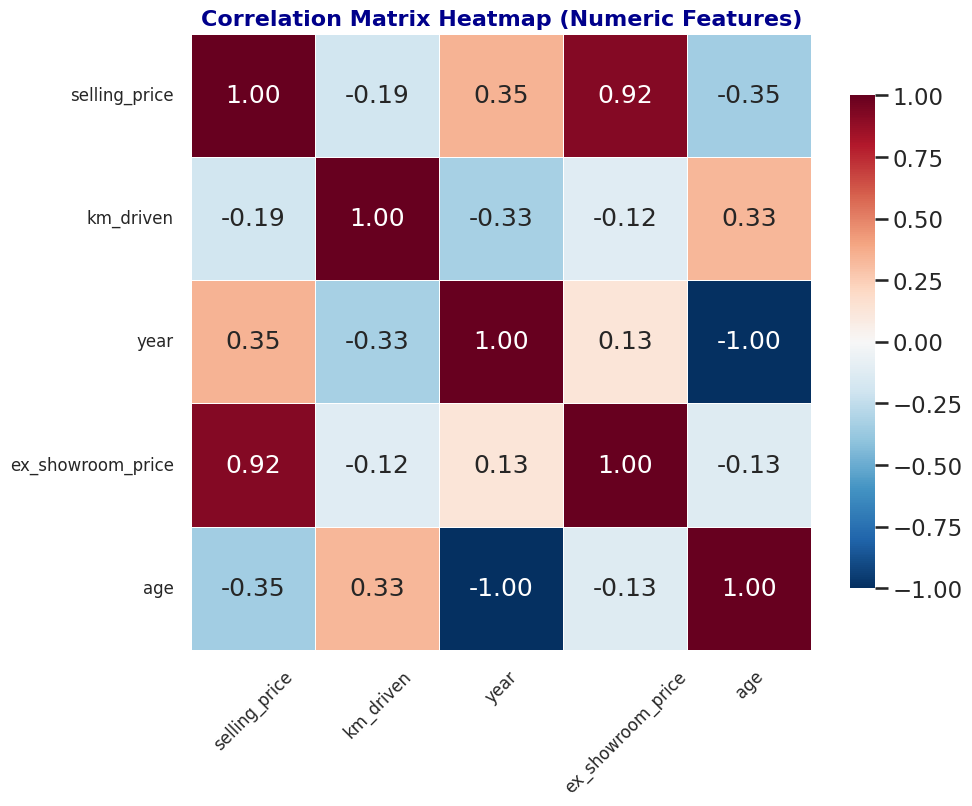

In [142]:
# Select numeric columns
numeric_df = df[['selling_price', 'km_driven', 'year', 'ex_showroom_price', 'age']]

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Visualize using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            linewidths=0.5, linecolor='white', fmt=".2f",
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix Heatmap (Numeric Features)",
          fontsize=16, fontweight='bold', color="darkblue")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()



# **ML WORK**

In [143]:
# Install scikit-learn (run once if not installed)
# pip install scikit-learn

from sklearn.model_selection import train_test_split

# Selecting features (X) and target (y)
X = df[['year', 'km_driven', 'ex_showroom_price', 'age']]  # independent variables
y = df['selling_price']                                   # target variable

# Apply train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((500, 4), (126, 4), (500,), (126,))

In [146]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Ensure numpy is imported for np.sqrt

# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

# Train models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso
}

for name, preds in models.items():
    print(name)
    # Calculate MSE first, then RMSE
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2_score(y_test, preds))
    print("-" * 30)


Linear Regression
RMSE: 27025.06417522509
R2 Score: 0.9179615559503215
------------------------------
Ridge Regression
RMSE: 27025.233214309097
R2 Score: 0.9179605296625232
------------------------------
Lasso Regression
RMSE: 27025.06375099171
R2 Score: 0.9179615585259636
------------------------------


In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [152]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree")
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("RMSE:", rmse_dt)
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("-"*30)

Decision Tree
RMSE: 44676.4607170086
R2 Score: 0.7757969745514477
------------------------------


In [154]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("RMSE:", rmse_gb)
print("R2 Score:", r2_score(y_test, y_pred_gb))
print("-"*30)


Gradient Boosting
RMSE: 49467.76938426902
R2 Score: 0.7251292028252135
------------------------------


In [156]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor (missing from previous cells)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

for name, preds in models.items():
    print(name)
    # Removed 'squared=False' and compute RMSE manually for compatibility
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("R2:", r2_score(y_test, preds))
    print("="*40)


Decision Tree
RMSE: 44676.4607170086
R2: 0.7757969745514477
Random Forest
RMSE: 51907.59066976395
R2: 0.6973465077376675
Gradient Boosting
RMSE: 49467.76938426902
R2: 0.7251292028252135


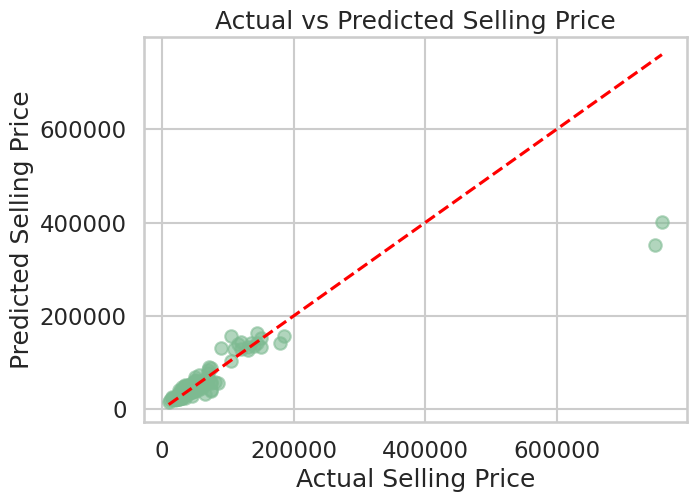

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()


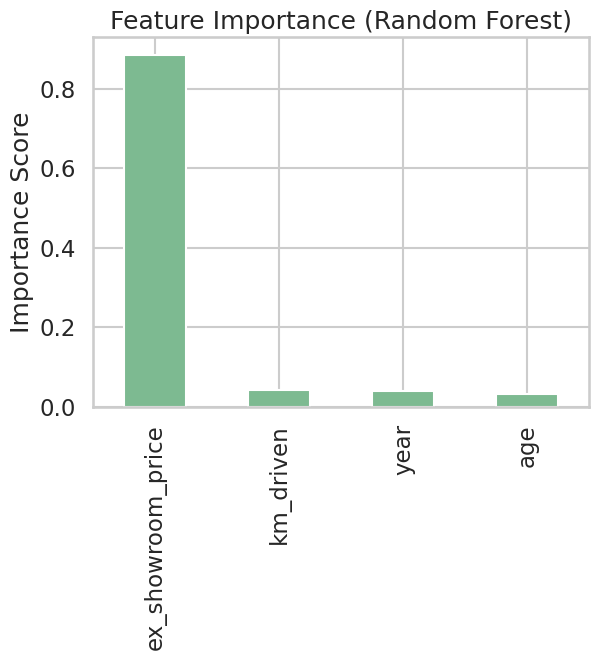

In [158]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


In [159]:
import joblib

# Save model
joblib.dump(gb, "best_bike_price_model.pkl")

# Load model (for future use)
loaded_model = joblib.load("best_bike_price_model.pkl")


In [160]:
sample_prediction = loaded_model.predict(X_test.iloc[:5])
sample_prediction


array([ 42377.90506536, 157406.70341877,  38750.41412034,  52347.09183358,
        24563.30088927])

In [164]:
import joblib

# Save best model (example: Gradient Boosting)
joblib.dump(gb, "best_bike_price_model.pkl")


['best_bike_price_model.pkl']

In [165]:
loaded_model = joblib.load("best_bike_price_model.pkl")


In [166]:
# Predict using loaded model
loaded_model.predict(X_test.iloc[:5])



array([ 42377.90506536, 157406.70341877,  38750.41412034,  52347.09183358,
        24563.30088927])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')